# Customer Analytics

> A comprehensive and detailed approach using Machine Learning

![Customer Analytics](https://images.idgesg.net/images/article/2018/03/crm_customer-relationship-management-100752744-large.jpg)

I am Abhishek Padghane with my project partner Nidhi Maheta in this term 3 project i try to solve given case studies by IMS proshool.
## Introduction to Customer Analytics

Customer analytics is a process by which data from customer behavior is used to help make key
business decisions via market segmentation and predictive analytics. This information is used by
businesses for direct marketing, site selection, and customer relationship management.
## Case study background

An International E-Commerce company(Electronic goods) wants to use some of the most advanced machine learning
techniques to analyse their customers with respect to their services and some important customer success matrix.
They also have future expansion plans to India.
They have some specific key insights to be found out from their existing customer database

## Problem Statement - 1

As a Data Scientist, they want you to build a model to predict if the shipments are or will reach on time or not.
For this, they want you to use various Logit/Probabilistic techniques with the most accurate model. The main models
they want you to build and compare the accuracy are:
1. Logistic Regression
2. Support Vector Machines
3. Random Forest
4. XgBoost or any other boosting technique.

It is not only about the accuracy but also about the variables impacting the model and generating
insights.

### Predictive Modeling

Predictive modeling uses statistics to predict outcomes. Most often the event one wants to predict is in the future, but predictive modelling can be applied to any type of unknown event, regardless of when it occurred. For example, predictive models are often used to detect crimes and identify suspects, after the crime has taken place.

In many cases the model is chosen on the basis of detection theory to try to guess the probability of an outcome given a set amount of input data, for example given an email determining how likely that it is spam.

Models can use one or more classifiers in trying to determine the probability of a set of data belonging to another set. For example, a model might be used to determine whether an email is spam or "ham" (non-spam).

Depending on definitional boundaries, predictive modelling is synonymous with, or largely overlapping with, the field of machine learning, as it is more commonly referred to in academic or research and development contexts. When deployed commercially, predictive modelling is often referred to as predictive analytics.

![Predictive model](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2015/09/Create-a-Predictive-Model.png)

![Predictive model](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2015/09/Make-Predictions.png)

### Exploratory data analytics

**EDA** helps to understand data, to get insights out of data and to analyze that our data has enough essense towards our modelling. EDA is more often **feature oriented process** means it depends on the columns of our dataset and its analysis.

#### Reading data

I am using pandas package for reading the dataset, because our data is in **csv** (Comma Separated Value) format, ill go for `pandas.read_csv()` which will read dataset in a **Pandas Dataframe**.

#### Feature disciption

**ID**: Id number of the customer

**Warehouse block**: The company has a big warehouse which is divided in various blocks such as A,B,C,D and so on.

**Mode of Shipment**: The company ships the products by different modes of transport such as ship, air and road.

**Customer care calls**: this variable indicates the number of calls made for enquiry of the shipment.(Sometimes customer make 
too many calls, hence the company wants to know that are these customers unknowingly favoured.

**Customer rating**: The company has rated every customer on various parameters, 1 being the lowest (Worst), 5 being highest (Best).

**Cost of the Product**: It is the cost of the product in USD.

**Prior purchases**: This variable indicates the number of prior purchases.

**Product importance**: The company has categorised the products in the range of high, medium and low based on various 
parameters.

**Gender**: Male or female.

**Discount offered**: it is the percentage of discount offered on that specific product.

**Weight in gms**: It is the weight in grams.

**Reached on Time**: Yes or No, It is the Y variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('E:\\STUDY\\Project\\IMS DS3\\term3.csv')

Checking first five observations of our dataset

In [2]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [3]:
print("Rows and columns :",data.shape)

Rows and columns : (10999, 12)


In total our dataset have **12 features** and **10999 observations**.

#### Checking missing values

In [4]:
cols = ["Warehouse_block","Mode_of_Shipment","Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Product_importance","Gender","Discount_offered","Weight_in_gms","Reached.on.Time_Y.N"]
na_summary = []
for col in cols:
    na_summary.append({'truth_value': data[col].isnull().value_counts().index[0], 'count': data[col].isnull().value_counts().values[0]})

na_per_column = []
i = 0
for item in na_summary:
    count_na = 0
    if item['truth_value'] == True:
        count_na += 1
    na_per_column.append({'Column': cols[i], 'na_count': count_na})
    i += 1
    
for item in na_per_column:
    print("For column ",item['Column']," Missing value count is ",item['na_count'])

For column  Warehouse_block  Missing value count is  0
For column  Mode_of_Shipment  Missing value count is  0
For column  Customer_care_calls  Missing value count is  0
For column  Customer_rating  Missing value count is  0
For column  Cost_of_the_Product  Missing value count is  0
For column  Prior_purchases  Missing value count is  0
For column  Product_importance  Missing value count is  0
For column  Gender  Missing value count is  0
For column  Discount_offered  Missing value count is  0
For column  Weight_in_gms  Missing value count is  0
For column  Reached.on.Time_Y.N  Missing value count is  0


So we can see that there is no missing value in our dataset 

### Getting Some basic insights from dataset 

Here i am trying to show details of some features of dataset using basic visualization, for that i am using `matplotlib` and `seaborn` package and for some numerical task i am using `numpy` package.  

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


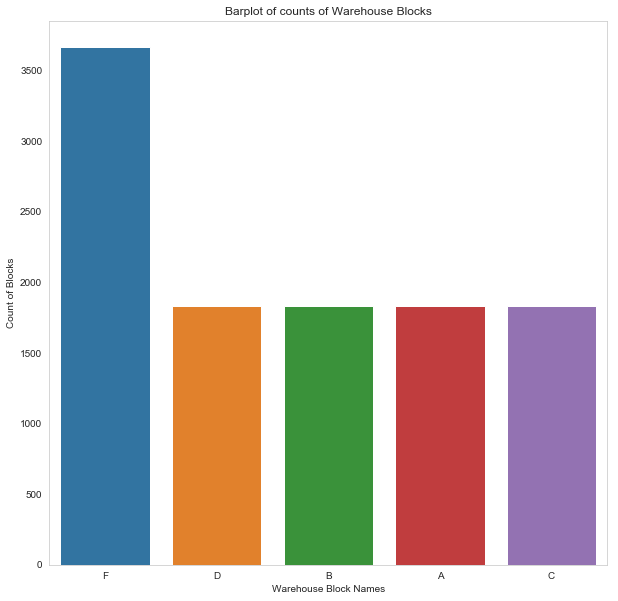

In [6]:
plt.figure(figsize=(10,10))
temp_dict = {'Warehouse Block Names': data['Warehouse_block'].value_counts().index.tolist(), 'Count of Blocks': data['Warehouse_block'].value_counts().values.tolist()}
display_data = pd.DataFrame.from_dict(temp_dict)
ax = sns.barplot(x = 'Warehouse Block Names', y = 'Count of Blocks', data=display_data)
plt.title('Barplot of counts of Warehouse Blocks')
plt.grid('off')
plt.show()

Here, maximum frequency is of **Block F.**

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


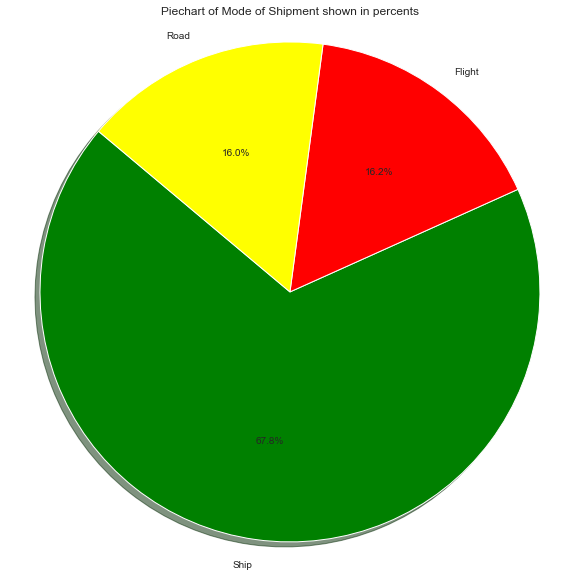

In [7]:
plt.figure(figsize=(10,10))
labels = data['Mode_of_Shipment'].value_counts().index
sizes = data['Mode_of_Shipment'].value_counts().values
colors = ['green','red','yellow','orange','blue']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Piechart of Mode of Shipment shown in percents')
plt.axis('equal')
plt.grid('off')
plt.show()

Here we can clearly see **most of the shipments are done through ships**, about **67.8%**.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


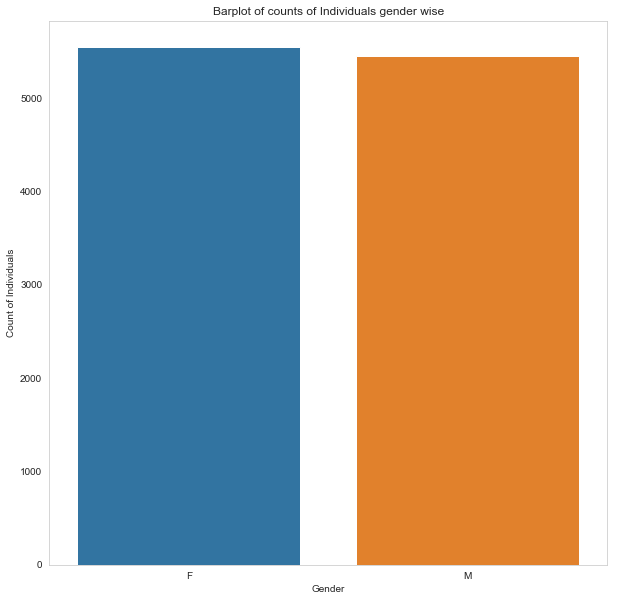

In [8]:
plt.figure(figsize=(10,10))
temp_dict = {'Gender': data['Gender'].value_counts().index.tolist(), 'Count of Individuals': data['Gender'].value_counts().values.tolist()}
display_data = pd.DataFrame.from_dict(temp_dict)
ax = sns.barplot(x = 'Gender', y = 'Count of Individuals', data=display_data)
plt.title('Barplot of counts of Individuals gender wise')
plt.grid('off')
plt.show()

Not much difference is in count of male and female.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


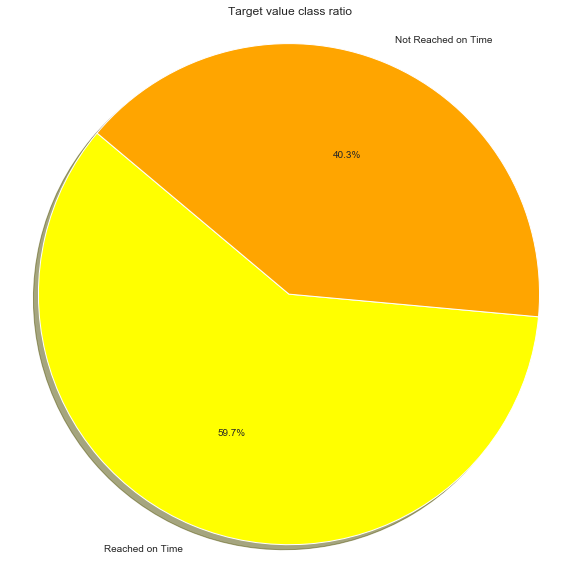

In [9]:
plt.figure(figsize=(10,10))
labels = data['Reached.on.Time_Y.N'].value_counts().index
labels = ['Reached on Time' if x == 1 else 'Not Reached on Time' for x in labels]
sizes = data['Reached.on.Time_Y.N'].value_counts().values
colors = ['yellow','orange']
plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Target value class ratio')
plt.axis('equal')
plt.grid('off')
plt.show()

as we can see, **59.7%** of shipments are **reached on time** and **40.3%%** of shipments are **not reached on time**. This also shows a balanced ratio of target variable classes.

### Checking for outliers

**Outliers** are **extreme values** that deviate from other observations on data , they may indicate a **variability** in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample. 
There are various methods of detecting outliers, what i am using is **checking distribution through boxplot**.

![Image 2](http://www.mindbodysoul-food.com/uploads/2/4/5/6/24562760/7158561_orig.jpg)

In our data set, columns **Customer care calls, Customer rating, Cost of the Product, Prior purchases, Discount offered, Weight in gms** are numeric columns so i am using thses columns for analyzing outliers.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


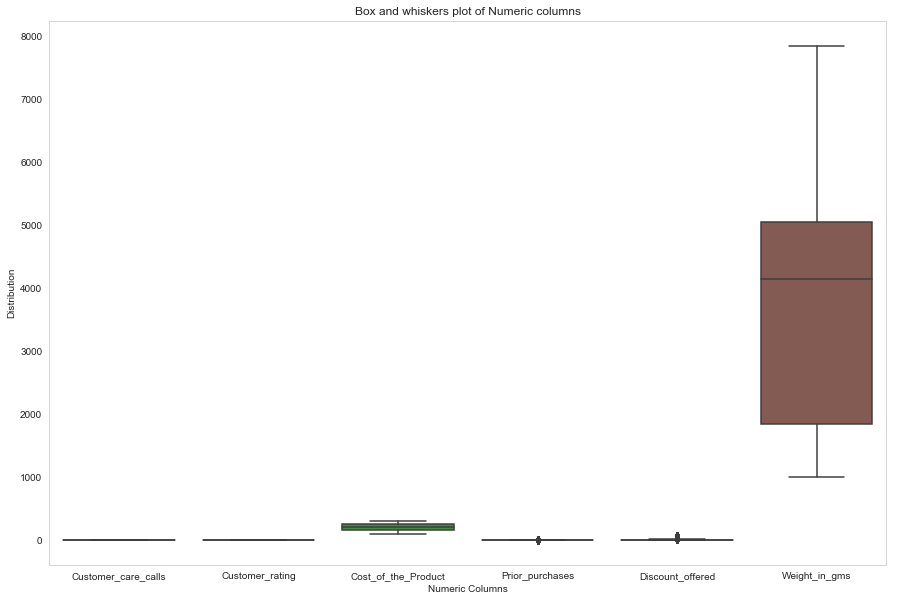

In [10]:
cols = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']
temp = data[cols]
plt.subplots(figsize=(15,10))
plt.xlabel('Numeric Columns')
plt.ylabel('Distribution')
plt.title('Box and whiskers plot of Numeric columns')
plt.grid('off')
ax = sns.boxplot(data=temp)
plt.show()

**Weight in gms** is of high scale but it does not consist any extreme value, to analyse other columns i am droping Weight in gms.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


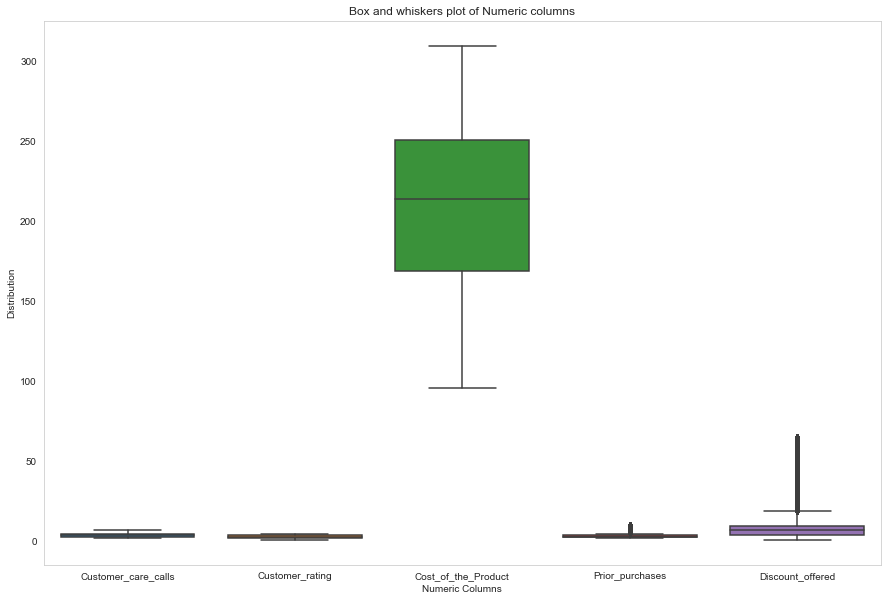

In [11]:
temp.drop('Weight_in_gms', axis=1, inplace=True)
plt.subplots(figsize=(15,10))
plt.xlabel('Numeric Columns')
plt.ylabel('Distribution')
plt.title('Box and whiskers plot of Numeric columns')
plt.grid('off')
ax = sns.boxplot(data=temp)
plt.show()

**Cost of product** also has large scale and does not contains outlier, droping for further analysis.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


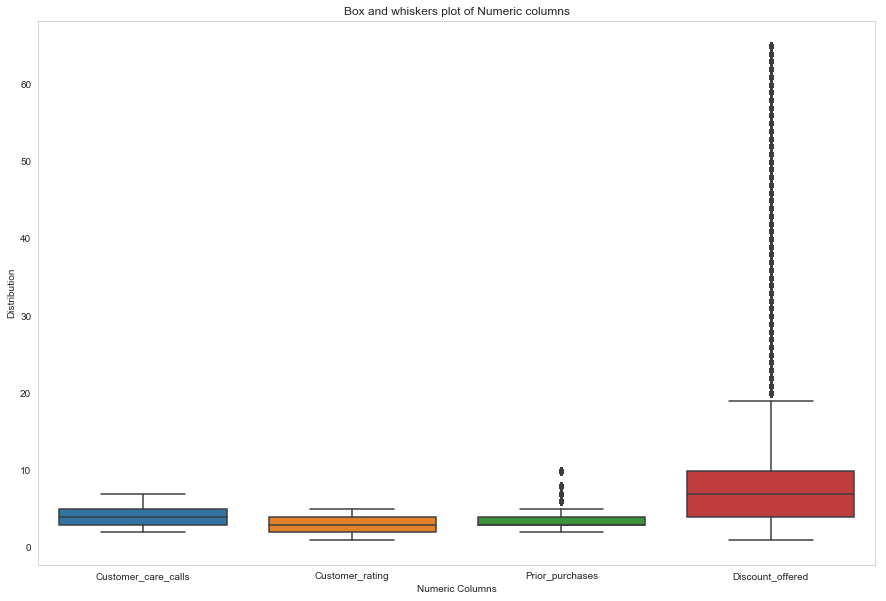

In [12]:
temp.drop('Cost_of_the_Product', axis=1, inplace=True)
plt.subplots(figsize=(15,10))
plt.xlabel('Numeric Columns')
plt.ylabel('Distribution')
plt.title('Box and whiskers plot of Numeric columns')
plt.grid('off')
ax = sns.boxplot(data=temp)
plt.show()

it seems that column **Discount offered** has heavy outliers, if we analyze, outliers are greater than **scale of 19**. Using above technique we have sucesfully detected outliers. 

### Outlier treatment

Now i have identified outliers, so now i need to treat them according to my further analysis. There are many methods to do it, what i am using is **transforming the values to standard normal values**.

**Standard Normal values** : Standard Normal values are transformed values which are transformed using formula of **Standard Normal variable**, also known as **Z score**. A standard normal variable is measure ratio of difference from average to the standard deviation. it follows **Standard normal distribution**. Formula is below..
![Image 4](http://dunun.club/wp-content/uploads//2019/01/z-score-test-math-the-formal-equation-for-z-score-is-enter-image-source-here-average-sat-math-subject-test-score.jpg)

![Image 5](http://ci.columbia.edu/ci/premba_test/c0331/images/s6/4946085992.gif)

In [13]:
def to_normal_score(observation):
    mean_ = np.mean(data["Discount_offered"])
    sd_ = np.std(data["Discount_offered"])
    return (observation - mean_)/sd_

temp[temp["Discount_offered"] > 19] = temp[temp["Discount_offered"] > 19].apply(to_normal_score)

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


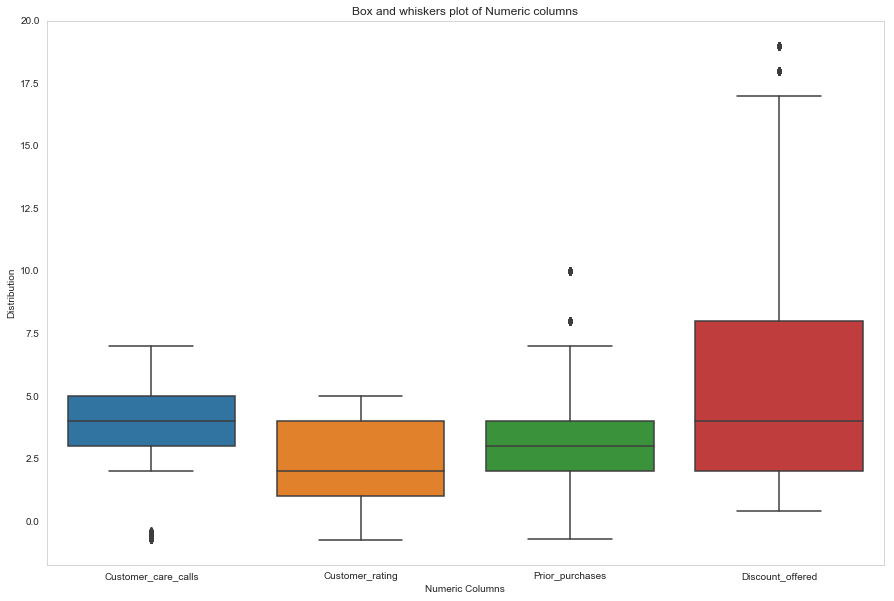

In [14]:
cols = ['Customer_care_calls','Customer_rating','Prior_purchases','Discount_offered']
temp = temp[cols]
plt.subplots(figsize=(15,10))
plt.xlabel('Numeric Columns')
plt.ylabel('Distribution')
plt.title('Box and whiskers plot of Numeric columns')
plt.grid('off')
ax = sns.boxplot(data=temp)
plt.show()

Now we can see that outliers are succesfully treated, distribution of Discount offered has no extreme value. Now i need to copy the data into original dataset.

In [15]:
data['Discount_offered'] = temp['Discount_offered']

### Model Building

Now my data is ready for model building, i am using `sklearn` package which contains pre functionalities for model building. So, i am using `LogisticRegresion`, `RandomForestClassifier` and `AdaBoostClassifier` from `sklearn`.
For extreme gradient boosting i am using `XGBClassifier` from `xgboost` package.
For cross validation set i am using `cross_val_score`.
For finding fine tuning parameter for model that i will use for training set i am using `GridSearchCV`
And finally for numerical tasks i am using `numpy`.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

Our dataset is ready for model building, but there are also few things i need to do:

**1: Labelling gender to a proper label:** Gender column is having labels like **M for Male** and **F for Female**, which conflits with the **F Warehouse Block**, so converting to dummy causes conflits.

**2: Converting categorical variables to dummy:** Machine learning model needs numeric data for model building, thats why i am converting categorical to numeric.

In [17]:
def change_text(token):
    if token == 'M':
        return 'Male'
    return 'Female'

data['Gender'] = data['Gender'].apply(change_text)
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,Female,1.889983,1233,1
1,2,F,Flight,4,5,216,2,low,Male,2.815636,3088,1
2,3,A,Flight,2,2,183,4,low,Male,2.136824,3374,1
3,4,B,Flight,3,3,176,4,medium,Male,10.000000,1177,1
4,5,C,Flight,2,2,184,3,medium,Female,2.013404,2484,1


Making dummy for categorical variables, checking for categorical variables.

In [18]:
data.dtypes

ID                       int64
Warehouse_block         object
Mode_of_Shipment        object
Customer_care_calls      int64
Customer_rating          int64
Cost_of_the_Product      int64
Prior_purchases          int64
Product_importance      object
Gender                  object
Discount_offered       float64
Weight_in_gms            int64
Reached.on.Time_Y.N      int64
dtype: object

Categorical columns are **Warehouse_block, Mode_of_Shipment, Product_importance and Gender.**

In [19]:
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for i in range(len(cols)):
    dummy = pd.get_dummies(data[cols[i]])
    data.drop(cols[i], axis=1, inplace=True)
    dummy_cols = dummy.columns
    data[dummy_cols] = dummy

In [20]:
data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,...,D,F,Flight,Road,Ship,high,low,medium,Female,Male
0,1,4,2,177,3,1.889983,1233,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,2.815636,3088,1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,2.136824,3374,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10.000000,1177,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,2.013404,2484,1,0,0,...,0,0,1,0,0,0,0,1,1,0


### Extracting predictors and response variables

We have **Reached on time** as our **target variable** and except **ID** all are our **predictor variables**, for this i am using `pd.DataFrame.as_matrix` to directly convert the dataframe to numpy array.

In [20]:
X = data[["Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","A","B","C","D","F","Flight","Road","Ship","high","low","medium","Male","Female"]].as_matrix()
y = data['Reached.on.Time_Y.N'].as_matrix()

## k_Fold Cross Validation

Cross-validation, sometimes called **rotation estimation**, or out-of-sample testing is any of various similar model validation techniques for assessing how the results of a **statistical analysis** will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

![Image6](https://sebastianraschka.com/images/faq/evaluate-a-model/k-fold.png)

## Logistic regresion

In statistics, the **logistic model** is a widely used **statistical model** that in its basic form uses a **logistic function** to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model.

### Logistic Function or Sigmoid

A **Logistic function or sigmoid** penalizes or squashes input in between the probability of 0 to 1. Below is graph of this function for x in range to -10 to 10 and step difference of 0.1.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


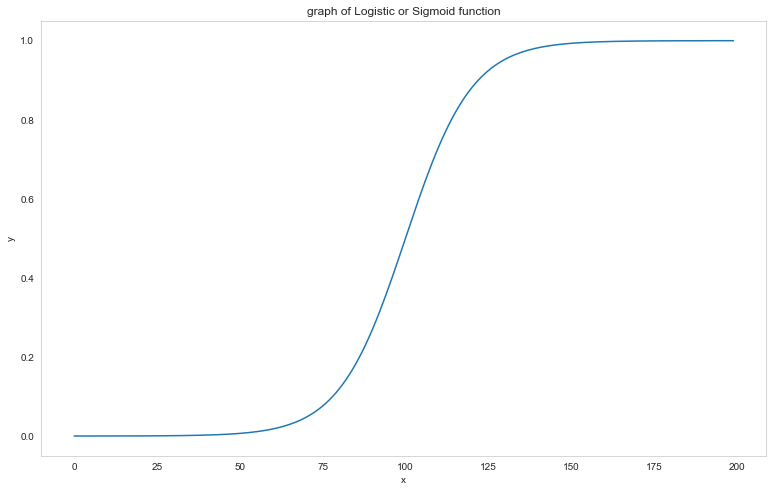

In [21]:
def Sigmoid(x):
    return 1/(1 + np.exp(-x))

plt.figure(figsize=(13,8))
x = np.arange(-10,10,0.1)
plt.plot(Sigmoid(x)),
plt.xlabel('x')
plt.ylabel('y')
plt.title('graph of Logistic or Sigmoid function')
plt.grid('off')
plt.show()

Building Logistic regression model for 10 cross validation folds.

In [22]:
model = LogisticRegression()
cv_scores_LG = cross_val_score(model,X,y,cv=10)
cv_scores_LG = cv_scores_LG*100

## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and **outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees**. Random decision forests correct for decision trees' habit of overfitting to their training set.

Building Random Forest model with 50 trees for 10 cross validation folds.

![Image7](https://d1rwhvwstyk9gu.cloudfront.net/2019/03/Random-Forest-Algorithm.jpg)

In [23]:
model = RandomForestClassifier(n_estimators=50)
cv_scores_RF = cross_val_score(model, X, y, cv=10)
cv_scores_RF = cv_scores_RF*100

### XGBoost

XGBoost is an open-source software library which provides a gradient boosting framework for C++, Java, Python, R, and Julia. It works on Linux, Windows, and macOS. From the project description, it aims to provide a "Scalable, Portable and Distributed Gradient Boosting (GBM, GBRT, GBDT) Library". Other than running on a single machine, it also supports the distributed processing frameworks Apache Hadoop, Apache Spark, and Apache Flink. It has gained much popularity and attention recently as the algorithm of choice for many winning teams of machine learning competitions.

Building Extreme Gradient Boost model for 20 cross validation folds.

In [24]:
model = XGBClassifier()
cv_scores_XG = cross_val_score(model, X, y, cv=10)
cv_scores_XG = cv_scores_XG*100

### ADABoost

AdaBoost, short for Adaptive Boosting, is a machine learning meta-algorithm formulated by Yoav Freund and Robert Schapire, who won the 2003 Gödel Prize for their work. It can be used in conjunction with many other types of learning algorithms to improve performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.

Building Adaptive Boosting model for 20 cross validation folds.

In [25]:
model = AdaBoostClassifier()
cv_scores_ADA = cross_val_score(model, X, y, cv=10)
cv_scores_ADA = cv_scores_ADA*100

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


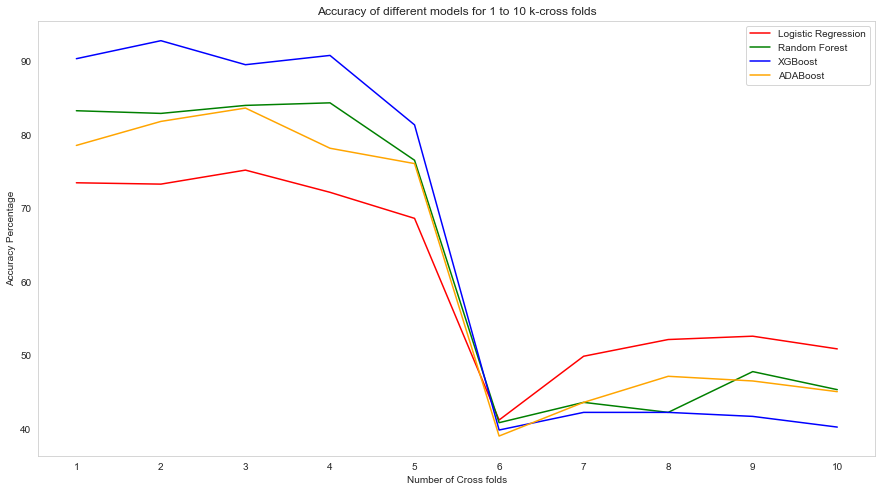

In [26]:
plt.figure(figsize=(15,8))
plt.plot(range(1,11),cv_scores_LG,'red',label='Logistic Regression')
plt.plot(range(1,11),cv_scores_RF,'green', label='Random Forest')
plt.plot(range(1,11),cv_scores_XG,'blue', label='XGBoost')
plt.plot(range(1,11),cv_scores_ADA,'orange', label='ADABoost')
plt.xlabel('Number of Cross folds')
plt.ylabel('Accuracy Percentage')
plt.title('Accuracy of different models for 1 to 10 k-cross folds')
plt.xticks(range(1,11))
plt.legend(loc='best')
plt.grid('off')
plt.show()

ploting **Average Accuracy** of **different models**

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


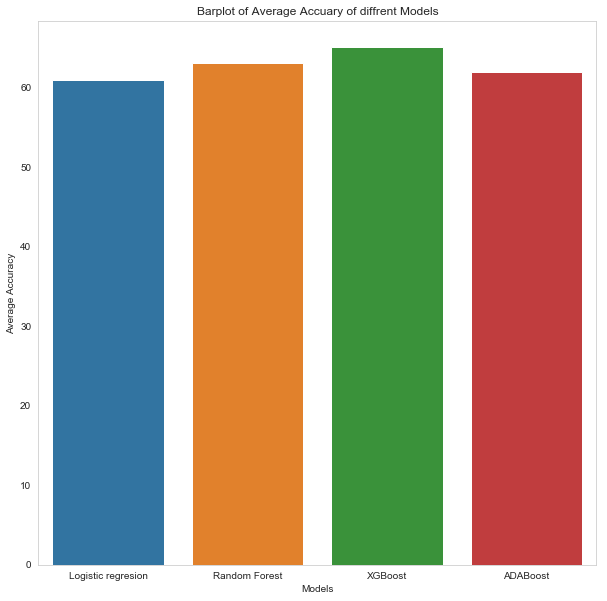

In [27]:
plt.figure(figsize=(10,10))
temp_dict = {
    'Models': ['Logistic regresion','Random Forest','XGBoost','ADABoost'],
    'Average Accuracy': [np.mean(cv_scores_LG),np.mean(cv_scores_RF), np.mean(cv_scores_XG), np.mean(cv_scores_ADA)]
}
display_data = pd.DataFrame.from_dict(temp_dict)
ax = sns.barplot(x = 'Models', y = 'Average Accuracy', data=display_data)
plt.title('Barplot of Average Accuary of diffrent Models')
plt.grid('off')
plt.show()

In [28]:
print('XGBoost Average accuracy is ', np.mean(cv_scores_XG))

XGBoost Average accuracy is  65.10850736240278


Highest accuracy is of **XGBoost model** as **65.48 %**

### Hyper Parameter Tuning and finding best tuning parameters

In machine learning, hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns. These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data. The objective function takes a tuple of hyperparameters and returns the associated loss.[1] Cross-validation is often used to estimate this generalization performance.

As we know that **XGBoost** is providing us with high accuracy, i am using xgboost for further model development. As my hyperparameters i am using **Boosting method** as **gbtree, linear and dart**, **number of trees as 10 and 15** and al last i am using **parallel jobs** as **5 and 10.**

For finding out best parametrs amongst provided combinaion of paramets i am using `GridSearchCV` from `sklearn.model_selection`.

In [29]:
parameter = {
    'booster': ('gbtree','gblinear','dart'),
    'n_estimators': [10,15],
    'n_jobs': [5,10],
}

model = XGBClassifier()
clf = GridSearchCV(model, cv=10, param_grid=parameter)
clf.fit(X, y)

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'booster': ('gbtree', 'gblinear', 'dart'), 'n_estimators': [10, 15], 'n_jobs': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Now i need to check best parameters.

In [30]:
clf.best_params_

{'booster': 'gbtree', 'n_estimators': 10, 'n_jobs': 5}

Here are our fine tuning parameters, **Boosting method as gbtree**, **number of trees as 10** and **parallel jobs as 5.**

### Generating results on test set

Above i have succesfully build prediction model, now i am generating prediction reults on tst file. The test file only contains **predictors**, it does not contain **target feature**, i have to use my model which is build on previous data to generate prediction results.

In [33]:
test_file_copy = test_file = pd.read_csv('E:\\STUDY\\Project\\IMS DS3\\Term end Project (1).csv')

In [34]:
print("Train data observations are ",data.shape[0]," and test data observations are ",test_file.shape[0])

Train data observations are  10999  and test data observations are  3993


Applying same transformation to test file.

In [35]:
test_file['Gender'] = test_file['Gender'].apply(change_text)
test_file.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,A,Road,3,4,168,3,low,Male,5,1841,NaN
1,2,B,Road,5,3,159,2,low,Female,58,1990,NaN
2,3,C,Road,2,2,282,3,medium,Female,42,3193,NaN
3,4,F,Road,4,3,278,4,high,Male,37,3248,NaN
4,5,D,Road,6,4,256,5,low,Female,6,3149,NaN


In [36]:
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for i in range(len(cols)):
    dumy = pd.get_dummies(test_file[cols[i]])
    test_file.drop(cols[i], axis=1, inplace=True)
    test_file[dumy.columns] = dumy

In [37]:
test_file.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,...,D,F,Flight,Road,Ship,high,low,medium,Female,Male
0,1,3,4,168,3,5,1841,NaN,1,0,...,0,0,0,1,0,0,1,0,0,1
1,2,5,3,159,2,58,1990,NaN,0,1,...,0,0,0,1,0,0,1,0,1,0
2,3,2,2,282,3,42,3193,NaN,0,0,...,0,0,0,1,0,0,0,1,1,0
3,4,4,3,278,4,37,3248,NaN,0,0,...,0,1,0,1,0,1,0,0,0,1
4,5,6,4,256,5,6,3149,NaN,0,0,...,1,0,0,1,0,0,1,0,1,0


Making target variable

In [38]:
X_new = test_file[["Customer_care_calls","Customer_rating","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms","A","B","C","D","F","Flight","Road","Ship","high","low","medium","Male","Female"]].as_matrix()

Building model on train data using our best hyperparameters.

In [39]:
model = XGBClassifier(booster='gbtree', n_estimators=10, n_jobs=5)
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10,
       n_jobs=5, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

Generating Prediction results

In [40]:
y_pred = model.predict(X_new)

### Checking for underfitting

Most of the time, prediction models underfit the data means the model is to simplistic and has very high bias. For that i need to check percentage of both the class labels of predicted results.

In [41]:
y_pred = pd.DataFrame(data=y_pred, columns=['predicted'])
y_pred_1 = y_pred[y_pred['predicted'] == 1]
y_pred_0 = y_pred[y_pred['predicted'] == 0]

print('Percent of 0 is', (y_pred_0.shape[0]/len(y_pred))*100, 'Percent of 1 is', (y_pred_1.shape[0]/len(y_pred))*100)

Percent of 0 is 0.0 Percent of 1 is 100.0


## It clearly seems that our model is underfiting the data

Our model produces 100 bias regarding the data. Thats why we need add regularization component in model.

### Variance bias tradeoff

Generally, parametric algorithms have a high bias making them fast to learn and easier to understand but generally less flexible. In turn, they have lower predictive performance on complex problems that fail to meet the simplifying assumptions of the algorithms bias.

Low Bias: Suggests less assumptions about the form of the target function.
High-Bias: Suggests more assumptions about the form of the target function.
Examples of low-bias machine learning algorithms include: Decision Trees, k-Nearest Neighbors and Support Vector Machines.

Examples of high-bias machine learning algorithms include: Linear Regression, Linear Discriminant Analysis and Logistic Regression.

### Regularization

Its a technique used for controlling bias-variance tradeoff in ML models. In my problem, i am using it to increase variance in my prediction results because my initial model is so simplistic and has high bias. In `XGBClassifier` we have `gamma` parameter for reguralization. I am checking for gamma value 1 to 15.

In [42]:
percent_list = []
for i in range(1,15):
    model = XGBClassifier(booster = 'gbtree', n_estimators = 15, n_jobs = 5, gamma=i)
    model.fit(X,y)
    y_pred = model.predict(X_new)
    y_pred = pd.DataFrame(y_pred,columns=['y_pred'])
    class_1 = y_pred[y_pred['y_pred'] == 1]
    class_0 = y_pred[y_pred['y_pred'] == 0]
    percent_list.append({'Class 1 Percentage': np.round((class_1.shape[0]/y_pred.shape[0])*100, decimals=2), 'Class 0 Percentage': np.round((class_0.shape[0]/y_pred.shape[0])*100, decimals=2)})

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


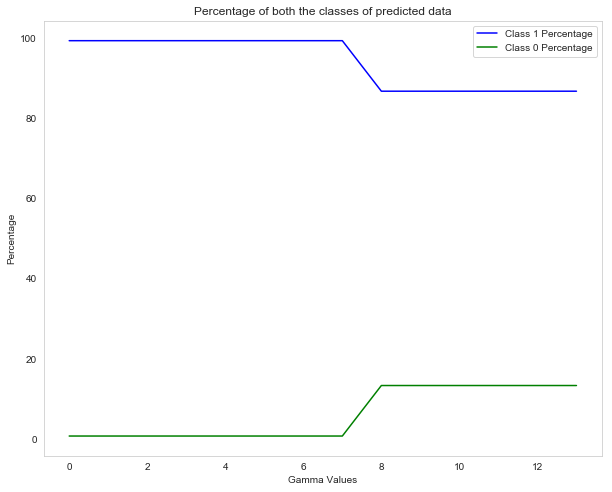

In [43]:
plt.figure(figsize=(10,8))
percent_data = pd.DataFrame.from_dict(percent_list)

plt.plot(percent_data['Class 1 Percentage'],'blue',label="Class 1 Percentage")
plt.plot(percent_data['Class 0 Percentage'],'green',label="Class 0 Percentage")
plt.xlabel('Gamma Values')
plt.ylabel('Percentage')
plt.title('Percentage of both the classes of predicted data')
plt.grid('off')
plt.legend()
plt.show()

As we can see after **gamma value equals 7** our XGBoost is reguralizing the variance and bias very well. After 7 our bias and variance is constant reguralized constant by gamma value, so i will use 9 as gamma value.

In [44]:
model = XGBClassifier(booster = 'gbtree', n_estimators = 15, n_jobs = 5, gamma=9)
model.fit(X,y)
y_pred = model.predict(X_new)
print("Class 1 ratio: ",(pd.Series(y_pred).value_counts()[1]/len(y_pred)) * 100, 'Class 0 ratio: ',(pd.Series(y_pred).value_counts()[0]/len(y_pred)) * 100)

Class 1 ratio:  86.67668419734535 Class 0 ratio:  13.323315802654644


Copying results in test dataset

In [45]:
test_file_copy['Reached.on.Time_Y.N'] = y_pred

Saving Test file

In [46]:
test_file_copy.to_csv('E:\\STUDY\\Project\\IMS DS3\\results.csv')

## Problem Statement 2
• They also want to know, if their shipments are reaching on time to their best customers who have a :
1. Good customer rating.
2. Good customer score.
3. Make recurring orders.
4. Highest payment buyers

This part of problem is guide by my project partner **Nidhi Maheta**.

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
data = pd.read_csv('E:\\STUDY\\Project\\IMS DS3\\term3.csv')

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


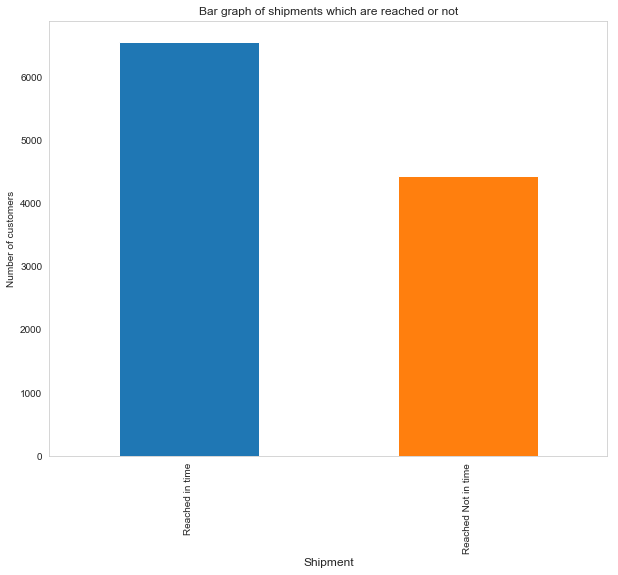

In [46]:
def label_target(row):
    if row == 0:
        return 'Reached Not in time'
    return 'Reached in time'

data['Reached.on.Time_Y.N'] = data['Reached.on.Time_Y.N'].apply(label_target)

plt.figure(figsize=(10,8))
data['Reached.on.Time_Y.N'].value_counts().plot(kind='bar')
plt.ylabel('Number of customers')
plt.xlabel('Shipment', fontsize=12)
plt.title('Bar graph of shipments which are reached or not')
plt.grid('off')
plt.show()

We are considering the customers who are having rating greater than or equal to 3

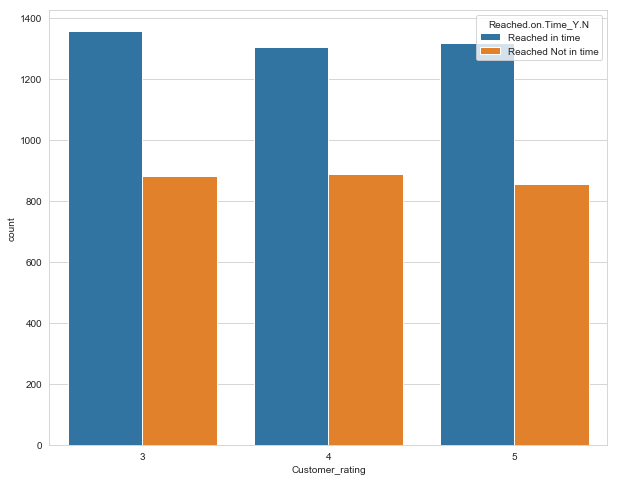

In [47]:
plt.figure(figsize=(10,8))
new_data = data[data['Customer_rating'] >= 3]
sns.countplot(x="Customer_rating",hue="Reached.on.Time_Y.N" ,data=new_data)
plt.show()

Customer rating with 3 is greater in reach in time delivery.

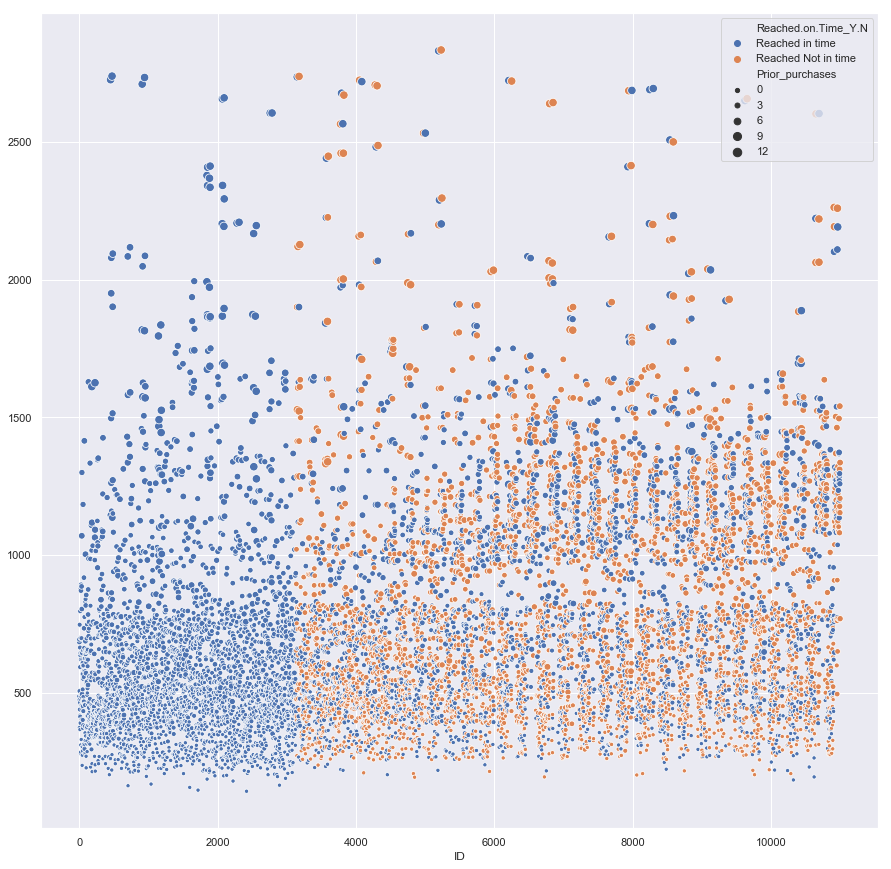

In [5]:
Prior_purchases=data['Prior_purchases']
Discount_offered=data['Discount_offered']
Cost_of_the_Product=data['Cost_of_the_Product']
High_Paycust=(Prior_purchases*Cost_of_the_Product)-Discount_offered

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
new=data['ID'].value_counts()* 100
plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="ID", y=High_Paycust, hue="Reached.on.Time_Y.N",size="Prior_purchases",data=data)

Let us see purchase frequency of customers

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


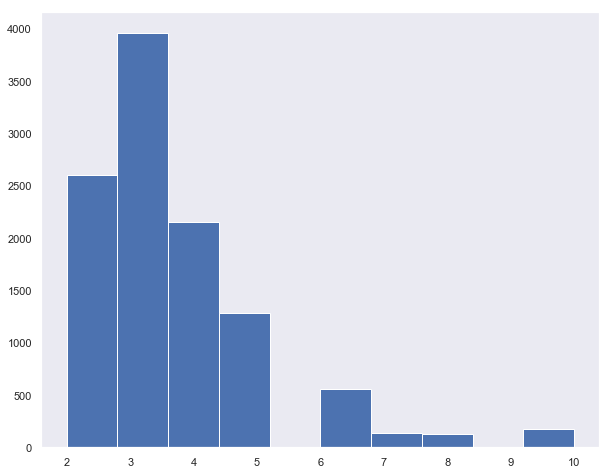

In [8]:
plt.figure(figsize=(10,8))
data['Prior_purchases'].hist(bins=10)
plt.grid('off')
plt.show()

## Problem Statement 3

• They want you to create a customer segmentation using clustering algorithm of the customers to whom the
shipments are not reaching on time.

## Cluster analysis

**Cluster analysis** or **clustering** is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

![Image 8](https://dimensionless.in/wp-content/uploads/2019/05/cover_cluster.jpg)

In [49]:
import pandas as pd
data = pd.read_csv('E:\\STUDY\\Project\\IMS DS3\\term3.csv')

In [50]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


As we know in our dataset we have some categorical columns, so i need to transform it to numerical and also i need to resolve the issue of gendef columns while converting it to dummy.

In [51]:
def change_text(token):
    if token == 'M':
        return 'Male'
    return 'Female'

data['Gender'] = data['Gender'].apply(change_text)
cols = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
for i in range(len(cols)):
    dummy = pd.get_dummies(data[cols[i]])
    data.drop(cols[i], axis=1, inplace=True)
    dummy_cols = dummy.columns
    data[dummy_cols] = dummy
data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,A,B,...,D,F,Flight,Road,Ship,high,low,medium,Female,Male
0,1,4,2,177,3,44,1233,1,0,0,...,1,0,1,0,0,0,1,0,1,0
1,2,4,5,216,2,59,3088,1,0,0,...,0,1,1,0,0,0,1,0,0,1
2,3,2,2,183,4,48,3374,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,4,3,3,176,4,10,1177,1,0,1,...,0,0,1,0,0,0,0,1,0,1
4,5,2,2,184,3,46,2484,1,0,0,...,0,0,1,0,0,0,0,1,1,0


According to the bussiness problem, i need to do grouping of customers for whom shipment is not reached on time, thats why i am using only 0 class observations.

In [52]:
reach_not_on_time = data[data['Reached.on.Time_Y.N'] == 0]

Now in our new data, there is no requirement of **Reach on Time** column thats why i am dropping it, also our dataset should be correspond to unsupervised learning.

In [53]:
reach_not_on_time.drop(['Reached.on.Time_Y.N'], axis=1, inplace=True)

## k-means clustering technique

k-means is  one of  the simplest unsupervised  learning  algorithms  that  solve  the well  known clustering problem. The procedure follows a simple and  easy  way  to classify a given data set  through a certain number of  clusters (assume k clusters) fixed apriori. The  main  idea  is to define k centers, one for each cluster.

These centers  should  be placed in a cunning  way  because of  different  location  causes different  result. So, the better  choice  is  to place them  as  much as possible  far away from each other. The  next  step is to take each point belonging  to a  given data set and associate it to the nearest center. When no point  is  pending,  the first step is completed and an early group age  is done.

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

## Principal component Analysis

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.

Its technique for **dimension reduction**. If i use dataset with all the features for clustering, then **due to curse of dimensionality**, my model will became unstable because in machine learning we use distances and if feature space or dimension increases, distances also increases. Thats why i need to reduce the dimensions of dataset and then i need to plug it in to clustering algorithm. For above reason i am using PCA.

In [55]:
reduced_data_reach_not_on_time = PCA(n_components=2, random_state=80, svd_solver='auto')
reduced_data_reach_not_on_time = reduced_data_reach_not_on_time.fit_transform(reach_not_on_time)

## Elbow Method

Elbow method is to check optimal number of clusters, elbow curve is curve which contains number of cluster in x axis and cluster variance in y axis. If there is no much variation explained after a cluster value, then we have to select that number of clusters.

For my analysis, i am checking for **clusters 1 to 20**, remember its not hard and fast rule, anybody could use any range to check it.

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


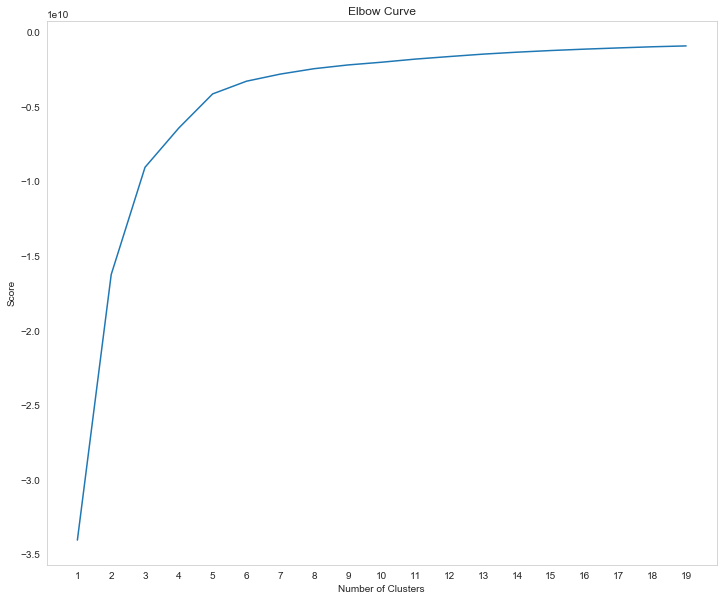

In [56]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(reduced_data_reach_not_on_time).score(reduced_data_reach_not_on_time) for i in range(len(kmeans))]

matplotlib.rcParams['axes.formatter.useoffset'] = False
plt.figure(figsize=(12,10))
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.xticks(range(1,20))
plt.grid('off')
plt.show()

As we can see, after **5 clusters** there is no much variation explained by elbow curve, therefore i am using **clusters equals to 5** for further analysis. It also imlies that the segments of customers for which the shipments are not reached will be 5. 

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


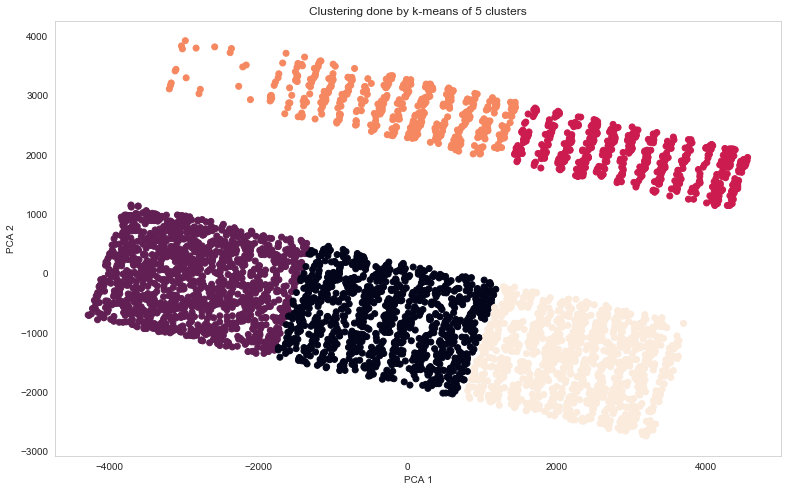

In [57]:
plt.figure(figsize=(13,8))
cluster = KMeans(n_clusters=5)
cluster.fit(reduced_data_reach_not_on_time)
plt.scatter(x=reduced_data_reach_not_on_time[:,0], y=reduced_data_reach_not_on_time[:,1], c=cluster.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering done by k-means of 5 clusters')
plt.grid('off')
plt.show()

## Feature Importance

I need to analyse impact of the feature in individual cluster. For that i will first variance of individual feature in all segments.

In [62]:
cluster = KMeans(n_clusters=5, random_state=80)
cluster.fit_transform(reach_not_on_time)
reach_not_on_time['Segments'] = cluster.labels_
reach_not_on_time.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,A,B,C,...,F,Flight,Road,Ship,high,low,medium,Female,Male,Segments
3135,3136,6,5,141,3,8,5031,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3136,3137,3,3,219,3,4,5956,0,0,1,...,0,0,1,0,0,1,0,0,1,0
3137,3138,4,3,161,3,7,4245,0,0,0,...,1,0,1,0,1,0,0,0,1,0
3138,3139,4,5,225,4,5,4622,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3140,3141,3,3,256,4,3,4732,1,0,0,...,0,0,1,0,0,0,1,0,1,0


I have added the labels to the extracted dataset. 

C:\Users\Abhishek\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


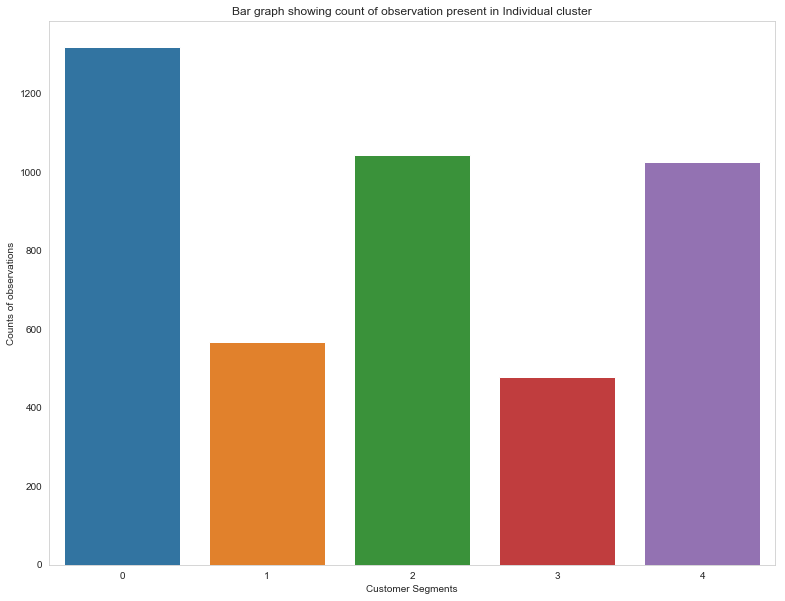

In [63]:
plt.figure(figsize=(13,10))
plt.grid('off')
data_dict = {'Customer Segments': reach_not_on_time['Segments'].value_counts().index, 'Counts of observations': reach_not_on_time['Segments'].value_counts().values}
data_dict_Dataframe = pd.DataFrame.from_dict(data_dict)
ax = sns.barplot(x='Customer Segments', y='Counts of observations', data=data_dict_Dataframe)
plt.title('Bar graph showing count of observation present in Individual cluster')
plt.show()

Now i will evaluate mean and variance of each segments

In [64]:
grouped = reach_not_on_time.groupby('Segments')
#grouped.mean()
grouped.var()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,A,B,C,D,F,Flight,Road,Ship,high,low,medium,Female,Male
Segments,,,,,,,,,,,,,,,,,,,,
0,5.429334e+05,0.927151,1.951255,1976.885725,2.586812,8.360962,333235.686488,0.141592,0.133447,0.138065,0.138065,0.224701,0.134997,0.132928,0.217194,0.100279,0.247569,0.246369,0.250069,0.250069
1,8.564605e+05,1.117492,1.986956,901.843195,0.562085,8.326400,83267.488623,0.140696,0.135976,0.133579,0.147589,0.221825,0.134781,0.148716,0.225290,0.012194,0.243287,0.241048,0.250428,0.250428
2,5.904268e+05,0.859019,1.984119,1992.640206,2.773318,8.136807,321611.126087,0.141564,0.144077,0.136451,0.139660,0.219485,0.121095,0.153237,0.221142,0.086694,0.248462,0.247360,0.250240,0.250240
3,1.100440e+06,1.179530,2.056564,1217.201131,0.617826,8.126698,86489.797922,0.150522,0.135422,0.142417,0.128207,0.222455,0.143790,0.132562,0.221749,0.020526,0.241244,0.236770,0.250485,0.250485
4,5.382755e+05,0.932214,2.068822,1937.285453,2.208647,8.371593,328387.457691,0.138916,0.137612,0.144056,0.138916,0.220679,0.141501,0.119265,0.213599,0.060193,0.248448,0.249763,0.250118,0.250118


## Problem Statement - 4
• Since the company also wants to start their operations in India, they want you to do a Sentiment analysis(Positive
or Negative) of their competitors such as:
1. Amazon India
2. Flipkart
3. Snapdeal

## Twitter

![Image 9](http://pngimg.com/uploads/twitter/twitter_PNG9.png)

Twitter is an American online news and social networking service on which users post and interact with messages known as "tweets".
Its world popular community and organization, thats why i need to perform sentiment analysis on the tweets of given users.

To solve this problem, first i need to set up **twitter developer api**, then i will use access keys to access the functionality of twiter api. I will pull tweets using and then i will use NLP process to process the text info. 

For fetching twitter tweets, i am using `tweepy` package. For making access connection i am using `tweepy.OAuthHandler`. For text process i am using `re` package which correspondes to regular expresions, and for sentiment analysis i am using `textblob` package.

In [65]:
import re 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob

Making access connection with twitter api using access keys.

### Steps to connect to twiter api:

Go to this [link](https://twitter.com/logout?redirect_after_logout=https:/developer.twitter.com/en/docs/twitter-for-websites/log-in-with-twitter/guides/implementing-sign-in-with-twitter.html), if you are having twiter account, then fill up the form and go to 'dashboard'.

If you are not having twitter account, then sign up and create twitter account.

After that go to 'Create app' and create app, give it unique name and go to its 'edit' tab.

In that edit tab, copy consumer key, consumer secret key, access token and access token secret key

In [66]:
consumer_key = "your consumer key"
consumer_secret_key = "your consumer secret key"
access_token = "your access token"
access_token_secret_key = "your access secret key"

try:
    auth = OAuthHandler(consumer_key=consumer_key, consumer_secret=consumer_secret_key)
    auth.set_access_token(key=access_token, secret=access_token_secret_key)
    api = tweepy.API(auth)
    print("Successful Authentication")
except:
    print('Error')

Successful Authentication


We need to sentiment analysis on **amazon**, **facebook** and **snapdeal**, thats why i am using there twitter account profile name for accessing tweets on there twitter account.

In [67]:
amp = []
users = ['@amazon','@facebook','@snapdeal']
fetched_tweets = api.search(users[1])
for tw in fetched_tweets:
    amp.append(tw.text)

Fetched text data contains unwanted objects, for this i am cleaning text, I am removing '@',tabs, white spaces and new line.

In [68]:
def clean_tweet(tweet): 
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
clean_tweets = []
for i in amp:
    clean_tweets.append(clean_tweet(i))

Below funtion is used for sentiment analysis. In sentiment analysis, sentiments are classified according to **polarity** and **Subjectivity**. Polarity is float which lies in the range of -1,1 where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of 0,1.

In [71]:
def twetify(list_):
    positive_ = 0
    negative_ = 0
    neutral_ = 0
    
    positive_tweets = []
    negative_tweets = []
    neutral_tweets = []
    
    for item in list_:
        analysis = TextBlob(item)
        if analysis.polarity > 0:
            positive_ += 1
            positive_tweets.append(item)
        elif analysis.polarity < 0:
            negative_ += 1
            negative_tweets.append(item)
        else:
            neutral_ += 1
            neutral_tweets.append(item)
    
    print("Positive Tweets percentage: ", (positive_/len(list_))*100 , "%")
    print("Negative Tweets percentage: ", (negative_/len(list_))*100, "%")
    print("Neutral Tweets percentage: ", (neutral_/len(list_))*100, "%")
    print()
    
    print("Positive Tweets")
    for item in positive_tweets:
        print(item)
    print()    
    
    print("Negative Tweets")
    for item in negative_tweets:
        print(item)
    print()
        
    print("Neutral Tweets")
    for item in neutral_tweets:
        print(item)
    print()
        
twetify(clean_tweets)

Positive Tweets percentage:  14.285714285714285 %
Negative Tweets percentage:  35.714285714285715 %
Neutral Tweets percentage:  50.0 %

Positive Tweets
RT Sooner or later reputable news organizations will use digital certificates for all their photos video and audio Sooner i
does anyone know of a decent alternative to Facebook One that doesn t arbitrarily throttl

Negative Tweets
You are allowing a fake video of Nancy Pelosi drunk to circulate over 3 million views so far Everybo
RT Milano This is disgusting Shame on you
Milano This is disgusting But killing babies isnt
RT Milano This is disgusting Shame on you
RT and other celebs and pundits are slamming for refusing to nix a manipulated vid of Nancy Pelosi

Neutral Tweets
MarkZuckerberg TrumpPuppet
standards of a Hindu rashtra
Hit them with campaign finance violations

CC
RT So won t remove a video that was altered to depict slurring her words because they don t ha


